# Importing of Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import confusion_matrix 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold, learning_curve, RandomizedSearchCV
import xgboost as xgb

/Users/rayan/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


# First Look To Data

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

df_train = df_train.copy()
df_test = df_test.copy()

# Let's concatenate test and train datasets, because we'll do a lot feature engineering and we need to get same feature sizes of train and test datasets
df_train_len = len(df_train)
df = pd.concat([df_train,df_test],axis=0, ignore_index=True)

In [3]:
print("*"*30, "HEAD", "*"*30)
display(df.head(5))
print("*"*30, "SHAPE", "*"*30)
print(f"Rows: {df.shape[0]}\nColumns: {df.shape[1]}")
print("*"*30, "INFO", "*"*30)
display(df.info())
print("*"*30, "DESCRIBE", "*"*30)
display(df.describe().T)
print("*"*30, "NULL?", "*"*30)
display(df.isnull().sum())
print("*"*30, "DUPLICATED", "*"*30)
display(df.duplicated().sum())
print("*"*30, "Types", "*"*30)
display(df.dtypes)
print("*"*30, "EXPLAINING", "*"*30)

****************************** HEAD ******************************


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


****************************** SHAPE ******************************
Rows: 12970
Columns: 14
****************************** INFO ******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 

None

****************************** DESCRIBE ******************************


,count,mean,std,min,25%,50%,75%,max
Age,12700.0,28.771969,14.387261,0.0,19.0,27.0,38.0,79.0
RoomService,12707.0,222.897852,647.596664,0.0,0.0,0.0,49.0,14327.0
FoodCourt,12681.0,451.961675,1584.370747,0.0,0.0,0.0,77.0,29813.0
ShoppingMall,12664.0,174.906033,590.558690,0.0,0.0,0.0,29.0,23492.0
Spa,12686.0,308.476904,1130.279641,0.0,0.0,0.0,57.0,22408.0
VRDeck,12702.0,306.789482,1180.097223,0.0,0.0,0.0,42.0,24133.0


****************************** NULL? ******************************


PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
dtype: int64

****************************** DUPLICATED ******************************


0

****************************** Types ******************************


PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported      object
dtype: object

****************************** EXPLAINING ******************************


**With the first look at the data, we know:**
    
- 12970 rows, 14 columns
- 8 object, 6 float64 columns
- all the columns have missing values instead of PassengerId
    - We will need to deal with them
- No duplicated values

# EDA

## Transported

<AxesSubplot:ylabel='Transported'>

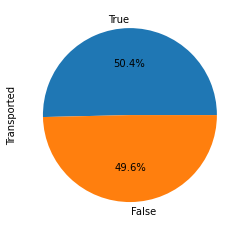

In [4]:
df_train["Transported"].value_counts().plot.pie(autopct='%1.1f%%')


We can observe that we have 50.4% transported, 49,6% not which is good because it's almost 50-50

## HomePlanet

In [5]:
pd.crosstab(df_train.HomePlanet, df_train.Transported, margins=True)

Transported,False,True,All
HomePlanet,,,
Earth,2651,1951,4602
Europa,727,1404,2131
Mars,839,920,1759
All,4217,4275,8492


In [6]:
earth_transported_percentage = (1951/4602)*100
europa_transported_percentage = (1404/2131)*100
mars_transported_percentage = (920/1759)*100

print(f"Percentage of transported from earth: {earth_transported_percentage}")
print(f"Percentage of transported from europa: {europa_transported_percentage}")
print(f"Percentage of transported from mars: {mars_transported_percentage}")

Percentage of transported from earth: 42.39461103867884
Percentage of transported from europa: 65.884561238855
Percentage of transported from mars: 52.30244457077885


We can see that the percentage of chance to be transported is going that way: europa > mars > earth

,Transported
HomePlanet,
Earth,1951
Europa,1404
Mars,920


Text(0.5, 1.0, 'HomePlanet-Transported')

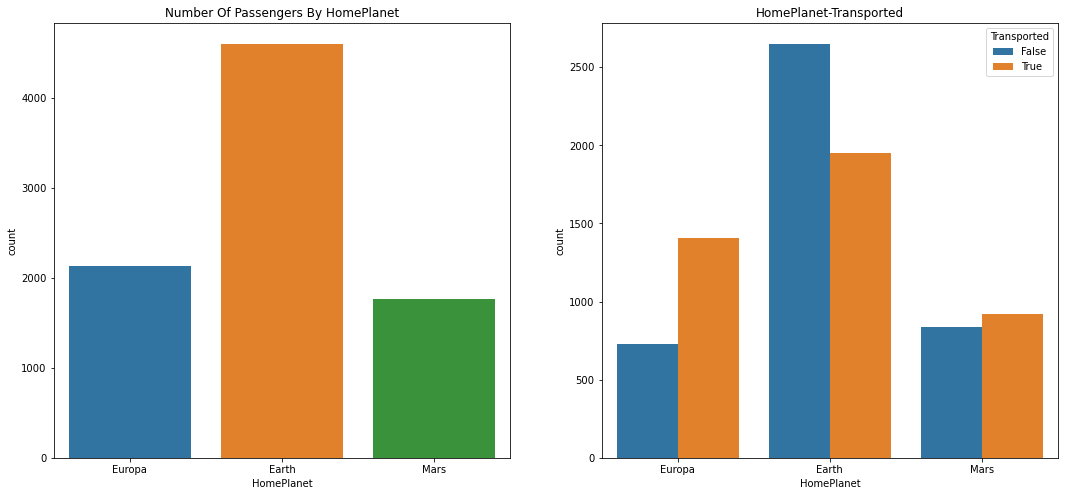

In [7]:
display(df_train.groupby("HomePlanet")[["Transported"]].sum())
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
sns.countplot(x='HomePlanet',data=df_train)
plt.title('Number Of Passengers By HomePlanet')

plt.subplot(1,2,2)
sns.countplot(x='HomePlanet',hue='Transported',data=df_train)
plt.title('HomePlanet-Transported')

In addition, we can see that most of the people in the ship come from Earth

## CryoSleep

In [8]:
pd.crosstab(df_train.CryoSleep, df_train.Transported, margins=True)

Transported,False,True,All
CryoSleep,,,
False,3650,1789,5439
True,554,2483,3037
All,4204,4272,8476


In [9]:
no_sleep_transported_percentage = (1789/5439)*100
sleep_transported_percentage = (2483/3037)*100
print(f"Percentage of no sleep transported : {no_sleep_transported_percentage}")
print(f"Percentage of sleep transported: {sleep_transported_percentage}")

Percentage of no sleep transported : 32.892075749218606
Percentage of sleep transported: 81.75831412578202


Now it is very interesting, indeed we can see that 82% of the people who were sleeping have been transported but only 32% of people who weren't sleeping have been.

<AxesSubplot:xlabel='CryoSleep'>

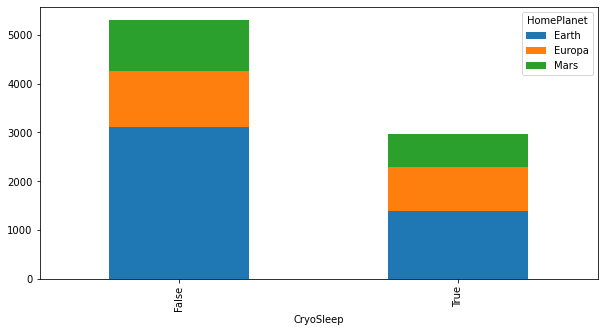

In [10]:
pd.crosstab(df_train.CryoSleep,df_train.HomePlanet).plot.bar(stacked=True, figsize=(10,5))

From this graph we can see that the choice of sleeping is almost 50-50 for people coming from Europa or Mars but people from Earth have less sleep

In [11]:
def encodage(df):
    code = {False:0,
            True:1}
    for col in df.columns:
        df[col]= df[col].map(code)
    return df

In [12]:
df_cryosleep = df_train[["CryoSleep", "Transported"]]
df_cryosleep = encodage(df_cryosleep)

/var/folders/rf/f2m8vn4n7ysd52pbzl0wfg_80000gp/T/ipykernel_24896/2450634346.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]= df[col].map(code)
/var/folders/rf/f2m8vn4n7ysd52pbzl0wfg_80000gp/T/ipykernel_24896/2450634346.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]= df[col].map(code)


In [13]:
df_cryosleep.corr()

,CryoSleep,Transported
CryoSleep,1.000000,0.468645
Transported,0.468645,1.000000


As we can see, there is a quite significative correlation between cryosleep and the target

## Destination

In [14]:
df_train.Destination.value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [15]:
pd.crosstab(df_train.Destination, df_train.Transported, margins=True)

Transported,False,True,All
Destination,,,
55 Cancri e,702,1098,1800
PSO J318.5-22,395,401,796
TRAPPIST-1e,3128,2787,5915
All,4225,4286,8511


In [16]:
destination_can_trans_percentage = (1098/1800)*100
destination_pso_trans_percentage = (401/796)*100
destination_trap_trans_percentage = (2787/5915)*100

print(f"Percentage of transported from dest 1: {destination_can_trans_percentage}")
print(f"Percentage of transported from dest 2: {destination_pso_trans_percentage}")
print(f"Percentage of transported from dest 3: {destination_trap_trans_percentage}")

Percentage of transported from dest 1: 61.0
Percentage of transported from dest 2: 50.37688442211056
Percentage of transported from dest 3: 47.11749788672866


at first view it doesn't seem that destination is an important feature

,Transported
Destination,
55 Cancri e,1098
PSO J318.5-22,401
TRAPPIST-1e,2787


Text(0.5, 1.0, 'Destination-Transported')

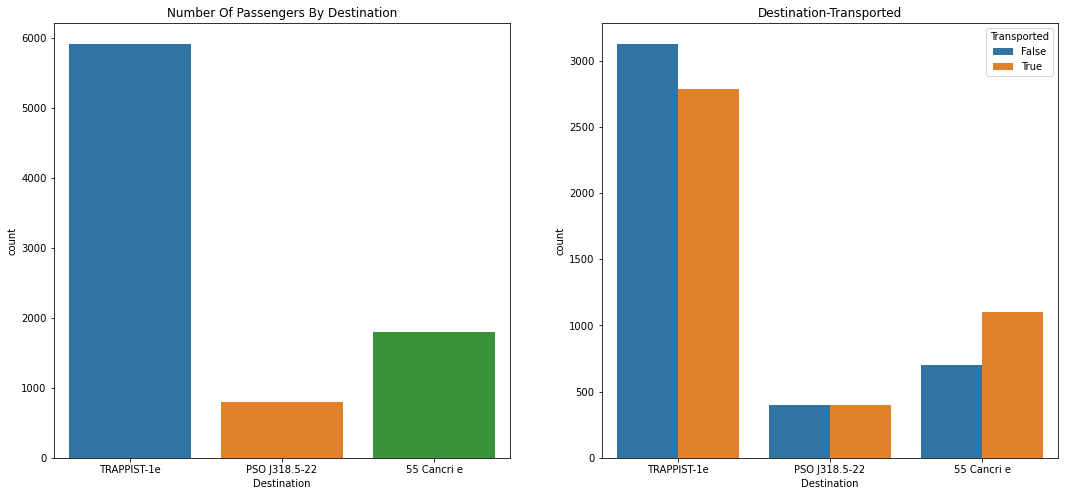

In [17]:
display(df_train.groupby("Destination")[["Transported"]].sum())
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
sns.countplot(x='Destination',data=df_train)
plt.title('Number Of Passengers By Destination')

plt.subplot(1,2,2)
sns.countplot(x='Destination',hue='Transported',data=df_train)
plt.title('Destination-Transported')

Text(0.5, 1.0, 'Destination-HomePlanet')

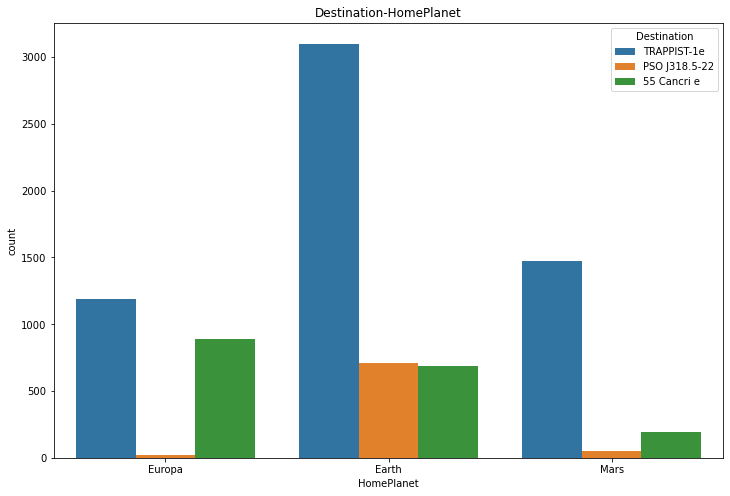

In [18]:
plt.figure(figsize=(12,8))
sns.countplot(x='HomePlanet',hue='Destination',data=df_train)
plt.title('Destination-HomePlanet')

Without suprise, most of the people are going to Trappist-1e even if their homeplanet is not the same

Finally it seems that destination is not an important feature for our prediction

## Cabin

In [19]:
df_train.Cabin.unique

<bound method Series.unique of 0          B/0/P
1          F/0/S
2          A/0/S
3          A/0/S
4          F/1/S
          ...   
8688      A/98/P
8689    G/1499/S
8690    G/1500/S
8691     E/608/S
8692     E/608/S
Name: Cabin, Length: 8693, dtype: object>

Cabin's form is like this: X/X/X, we can try to split thes X values to see if we can extract anything but first, we need to remove the NaN values

In [20]:
df_train_cab = df_train.copy()

In [21]:
df_train_cab["Cabin"].dropna()
df_train_cab.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


### Creation of Deck and Side

In [22]:
df_train_cab["Deck"]=df_train_cab["Cabin"].apply(lambda x: str(x)[0])

In [23]:
df_train_cab["Side"]=df_train_cab["Cabin"].apply(lambda x: str(x)[-1])

### Analyse of Deck and Side

#### Deck

In [24]:
df_train_cab.Deck.value_counts()

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
n     199
T       5
Name: Deck, dtype: int64

Text(0.5, 1.0, 'Deck-Transported')

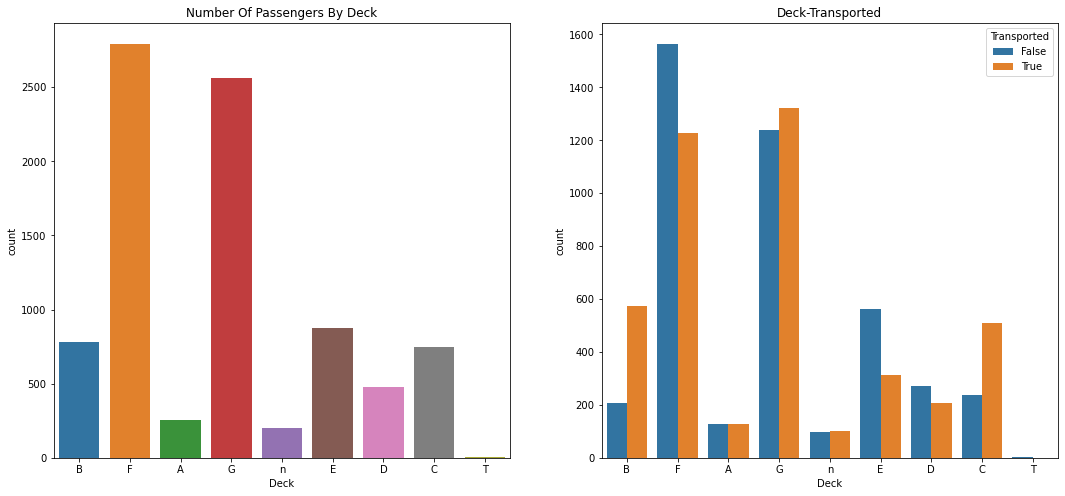

In [25]:
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
sns.countplot(x='Deck',data=df_train_cab)
plt.title('Number Of Passengers By Deck')

plt.subplot(1,2,2)
sns.countplot(x='Deck',hue='Transported',data=df_train_cab)
plt.title('Deck-Transported')

B and C seems to be the one with the most Transported but it's not really enough to affirm that they have an impact

#### Side

Text(0.5, 1.0, 'Side-Transported')

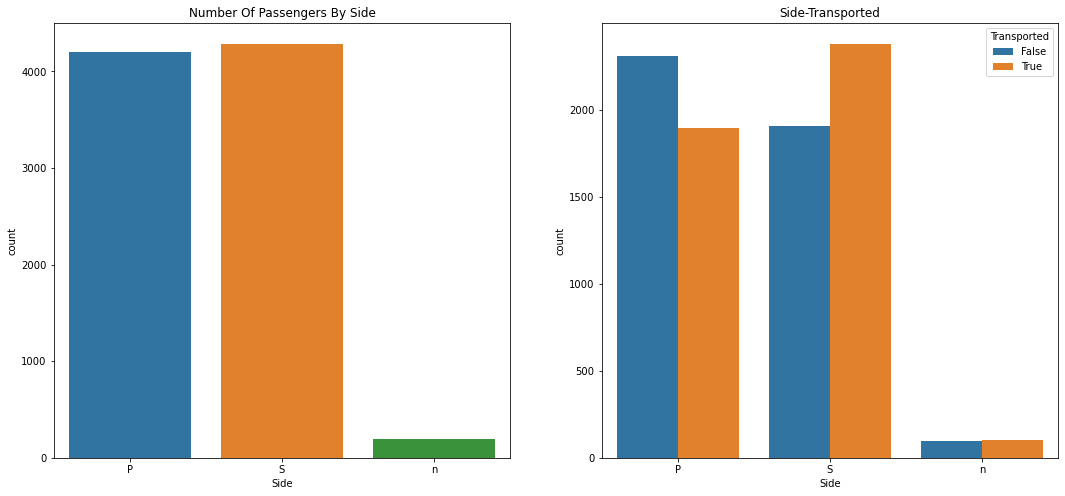

In [26]:
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
sns.countplot(x='Side',data=df_train_cab)
plt.title('Number Of Passengers By Side')

plt.subplot(1,2,2)
sns.countplot(x='Side',hue='Transported',data=df_train_cab)
plt.title('Side-Transported')

same as deck, side doesn't seem to have any impact

By this fact, Cabin is probably not an important feature and we can drop it

## Age

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.82793,14.489021,0.0,19.0,27.0,38.0,79.0


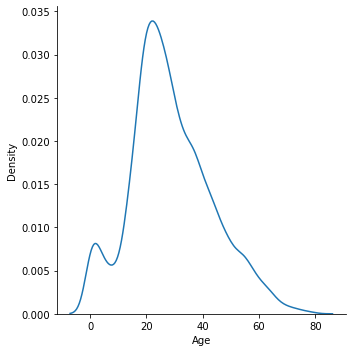

In [27]:
display(df_train[["Age"]].describe().T)
sns.displot(data=df_train, x="Age",kind="kde")

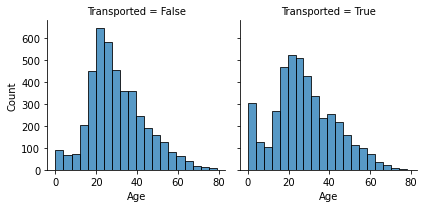

In [28]:
g = sns.FacetGrid(df_train, col = "Transported")
g.map(sns.histplot, "Age", bins = 20)
plt.show()

- Age <= 10 has a high transported rate,
- Large number of around 20 years old haven't been transported,
- Most passengers are in 15-35 age range,

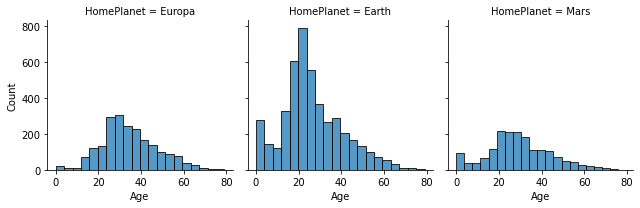

In [29]:
g = sns.FacetGrid(df_train, col = "HomePlanet")
g.map(sns.histplot, "Age", bins = 20)
plt.show()

It seems quite equitable

## VIP

Text(0.5, 1.0, 'VIP-Transported')

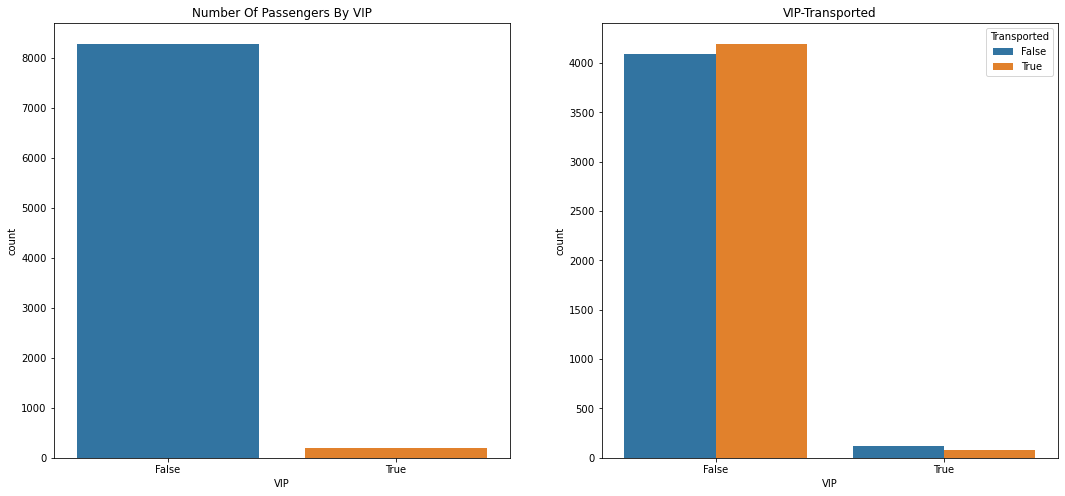

In [30]:
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
sns.countplot(x='VIP',data=df_train)
plt.title('Number Of Passengers By VIP')

plt.subplot(1,2,2)
sns.countplot(x='VIP',hue='Transported',data=df_train)
plt.title('VIP-Transported')

We have a small party of VIP but it doesn't seem that there is any correlation between VIP and Transported

In [31]:
pd.crosstab(df_train.VIP, df_train.Transported, margins=True)

Transported,False,True,All
VIP,,,
False,4093,4198,8291
True,123,76,199
All,4216,4274,8490


In [32]:
df_VIP = df_train[["VIP", "Transported"]]
df_VIP = encodage(df_VIP)
df_VIP.corr()

/var/folders/rf/f2m8vn4n7ysd52pbzl0wfg_80000gp/T/ipykernel_24896/2450634346.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]= df[col].map(code)
/var/folders/rf/f2m8vn4n7ysd52pbzl0wfg_80000gp/T/ipykernel_24896/2450634346.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]= df[col].map(code)


,VIP,Transported
VIP,1.00000,-0.03765
Transported,-0.03765,1.00000


We can easily comfirm that this feature doesn't seem important at all due to the fact that it is barely corrolated to the target

## Bills

To simplify, we are going to combine RoomService, FoodCourt, ShoppingMall, Spa and VRDEck

In [33]:
df_train_bills = df_train.copy()
df_train_bills["Bills"] = df_train_bills["RoomService"]+df_train["FoodCourt"]+df_train["ShoppingMall"]+df_train["Spa"]+df_train["VRDeck"]

In [34]:
df_train_bills.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Bills
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0


In [35]:
df_train_bills.groupby("VIP")[["Bills"]].mean()

,Bills
VIP,
False,1411.643705
True,4599.737430


VIP paid more during the trip than no-VIP which seems logiqual

<AxesSubplot:xlabel='Bills', ylabel='Count'>

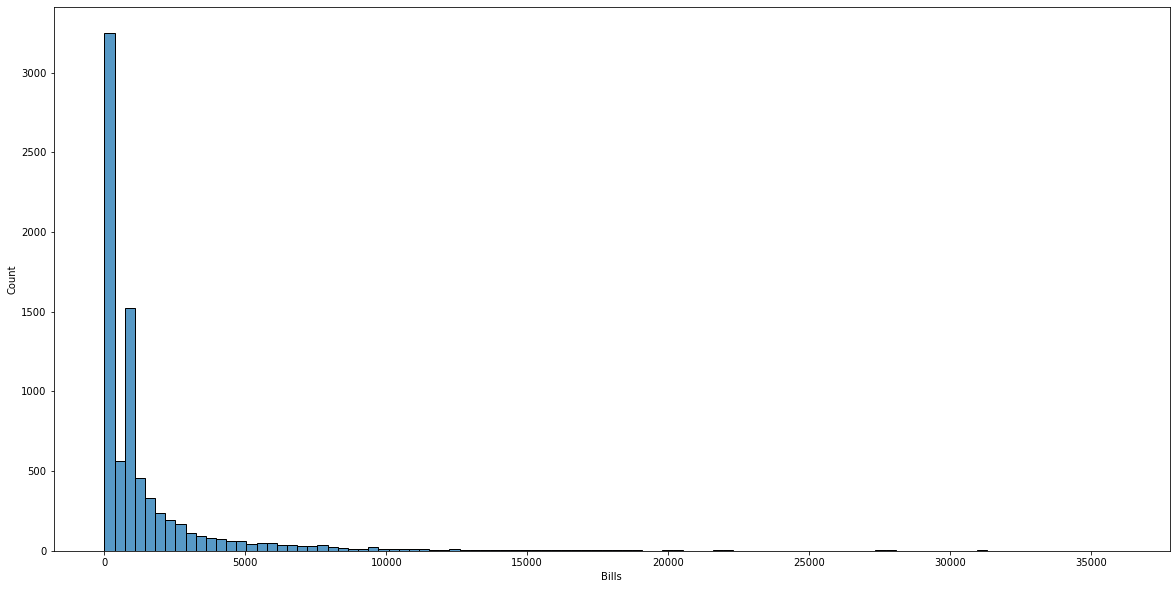

In [36]:
plt.figure(figsize=(20,10))
sns.histplot(data=df_train_bills, x="Bills", bins=100)

Most of the people didn't spend a lot which can be because they were sleeping, let's check:

In [37]:
df_train_bills.groupby("CryoSleep")[["Bills"]].mean()

,Bills
CryoSleep,
False,2304.194614
True,0.000000


,Bills,Transported
Bills,1.000000,-0.197671
Transported,-0.197671,1.000000


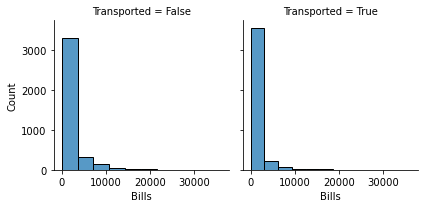

In [38]:
g = sns.FacetGrid(df_train_bills, col = "Transported")
g.map(sns.histplot, "Bills", bins = 10)

df_fares = df_train_bills[["Bills", "Transported"]]
display(df_fares.corr())

As we can see, we don't have a strong correlation between the two, the correlation s negative which means that less you pay more younhave chance to be transported but as we demonstrate, people who were sleeping didn't spend any money and they were the one transported the most so it's normal 

# Feature Engineering
### **Steps:**

- **Handling with missing values**
- **Handling with outliers**
- **Feature Transformation**
- **Encoding**
- **Feature Selection**
- **Preparing of Train and Test Values**
- **Feature Scaling**

## Feature Selection

First of all, we are going to drop the columns that we find useless in the EDA part 

In [39]:
df = df.copy()
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [40]:
df.drop(["PassengerId", "Cabin", "VIP", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "Name"], axis=1, inplace=True)

## Missing values

In [41]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,Transported
0,Europa,False,TRAPPIST-1e,39.0,False
1,Earth,False,TRAPPIST-1e,24.0,True
2,Europa,False,TRAPPIST-1e,58.0,False
3,Europa,False,TRAPPIST-1e,33.0,False
4,Earth,False,TRAPPIST-1e,16.0,True


<AxesSubplot:>

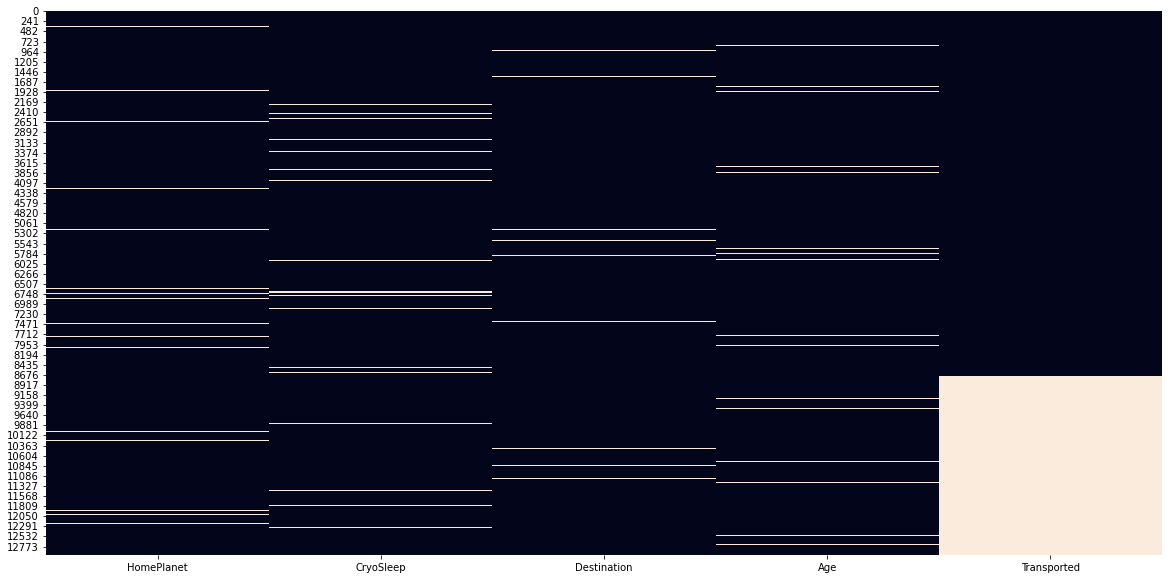

In [42]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

Every categories have some missing values to deal with.Also, Transported have missing values but because of the test dataset. We will split the dataset in model section, so we will not have the missing value problem of Transported feature.

In [43]:
df.isna().sum()/df.shape[0]

HomePlanet     0.022205
CryoSleep      0.023901
Destination    0.021126
Age            0.020817
Transported    0.329761
dtype: float64

As we can see, the missing values are rares.
Let's fill them:

In [44]:
df["Age"] = df["Age"].fillna(df["Age"].median())
df["HomePlanet"] = df["HomePlanet"].fillna(df["HomePlanet"].mode()[0])
df["CryoSleep"] = df["CryoSleep"].fillna(df["CryoSleep"].mode()[0])
df["Destination"] = df["Destination"].fillna(df["Destination"].mode()[0])



In [45]:
df.isna().sum()

HomePlanet        0
CryoSleep         0
Destination       0
Age               0
Transported    4277
dtype: int64

## Handling with Outliers

<AxesSubplot:xlabel='Age'>

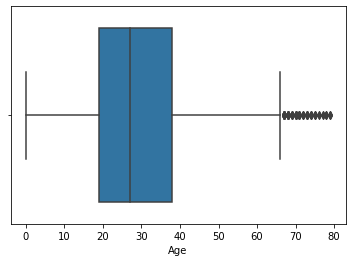

In [46]:
sns.boxplot(data=df_train, x="Age")

## Feature Transformation

## Encoding

In [47]:
for col in df.select_dtypes("object"): 
    print(f"{col :-<40}{df[col].unique()}") 

HomePlanet------------------------------['Europa' 'Earth' 'Mars']
Destination-----------------------------['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']
Transported-----------------------------[False True nan]


In [48]:
lbe=LabelEncoder()
df["CryoSleep"] = lbe.fit_transform(df["CryoSleep"])
display(df.head())

,HomePlanet,CryoSleep,Destination,Age,Transported
0,Europa,0,TRAPPIST-1e,39.0,False
1,Earth,0,TRAPPIST-1e,24.0,True
2,Europa,0,TRAPPIST-1e,58.0,False
3,Europa,0,TRAPPIST-1e,33.0,False
4,Earth,0,TRAPPIST-1e,16.0,True


In [49]:
df = pd.get_dummies(data=df, prefix=["HomePlanet"], columns=["HomePlanet"], drop_first=True)
df = pd.get_dummies(data=df, prefix=["Destination"], columns=["Destination"], drop_first=True)

In [50]:
df.head()

,CryoSleep,Age,Transported,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,39.0,False,1,0,0,1
1,0,24.0,True,0,0,0,1
2,0,58.0,False,1,0,0,1
3,0,33.0,False,1,0,0,1
4,0,16.0,True,0,0,0,1


## Feature Selection bis

### Selection with Correlation

<AxesSubplot:>

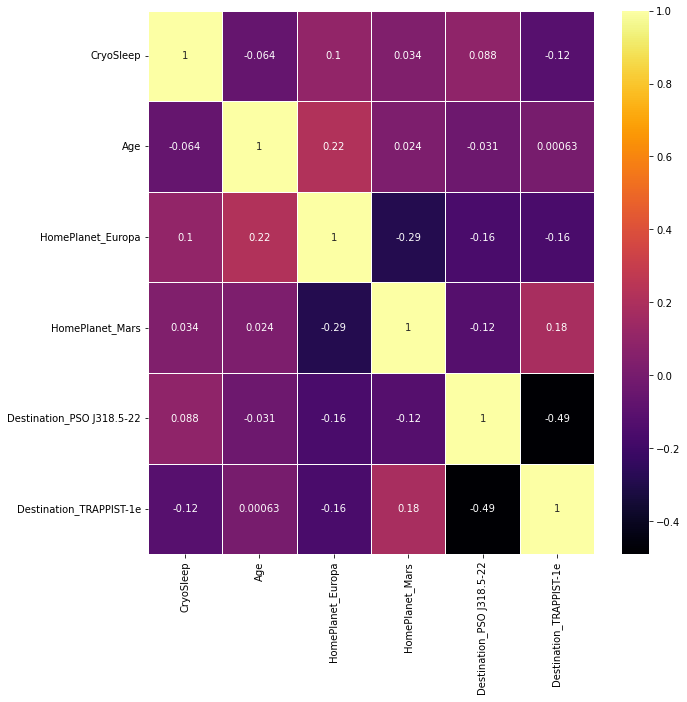

In [51]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='inferno',linewidths=.9)

It doesn't seem that we have case of multicollinearity

## Feature Scaling

In [52]:
num_col = ["Age"]
cat_col = ["Transported", "CryoSleep", "HomePlanet_Europa", "HomePlanet_Mars", "Destination_PSO J318.5-22", "Destination_TRAPPIST-1e"]

In [53]:
scaler = RobustScaler()

In [54]:
df_scaled = scaler.fit_transform(df[num_col])
# Creating a dataframe for ease of viewing

df_scaled = pd.DataFrame(df_scaled,columns=num_col)
df = pd.concat([df[cat_col],df_scaled],axis=1)
df.head()

,Transported,CryoSleep,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Age
0,False,0,1,0,0,1,0.705882
1,True,0,0,0,0,1,-0.176471
2,False,0,1,0,0,1,1.823529
3,False,0,1,0,0,1,0.352941
4,True,0,0,0,0,1,-0.647059


## Preparing of Train and Test Values

In [55]:
df_train = df[:df_train_len]
df_test = df[df_train_len:]
df_test.drop(labels=["Transported"],axis = 1,inplace=True)

/var/folders/rf/f2m8vn4n7ysd52pbzl0wfg_80000gp/T/ipykernel_24896/4067461728.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(labels=["Transported"],axis = 1,inplace=True)


In [56]:
df_train.head()

,Transported,CryoSleep,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Age
0,False,0,1,0,0,1,0.705882
1,True,0,0,0,0,1,-0.176471
2,False,0,1,0,0,1,1.823529
3,False,0,1,0,0,1,0.352941
4,True,0,0,0,0,1,-0.647059


In [57]:
df_test.head()

,CryoSleep,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Age
8693,1,0,0,0,1,0.000000
8694,0,0,0,0,1,-0.470588
8695,1,1,0,0,0,0.235294
8696,0,1,0,0,1,0.647059
8697,0,0,0,0,1,-0.411765


In [58]:
y_train = df_train["Transported"]
X_train = df_train.drop(labels = ["Transported"],axis = 1)
X_test = df_test

In [59]:
y_train = lbe.transform(y_train)

In [60]:
y_train.ravel()

array([0, 1, 0, ..., 1, 0, 1])

# Model
## Base Model with Cross Validation

In [61]:
model_list = [RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(), LogisticRegression(),KNeighborsClassifier(),SVC(), DecisionTreeClassifier()]

In [62]:
def getCVscore(l1):
    res = []
    # Running a CV score loop for the first set of models - Training data scaled
    for model in l1:
        res.append(cross_val_score(model,X_train,y_train,cv=5,scoring='accuracy').mean())
    return res

In [63]:
getCVscore(model_list)

[0.7094225018544976,
 0.7135631432426477,
 0.7355370035951776,
 0.7114927232891144,
 0.6843433424365285,
 0.7340415605969067,
 0.7099978096746209]

The most performant is the GradientBoostingClassifier

## Hyper Parameter Tunning with GridSearchCV and RandomizedSearchCV

In [65]:
GBC = GradientBoostingClassifier()
gbc_params = {
              'n_estimators' : [100,200,500,1000],
              'learning_rate': [0.1,0.01,0.001],
              'max_depth': [2,3,7],
              'min_samples_split':[2,10,50,100],
              'min_samples_leaf': [1,5,7],
              'max_features': [0.3, 0.1] 
              }
grid = RandomizedSearchCV(GBC,gbc_params, cv=5, scoring="accuracy",n_iter=40)
gradient_tuned = grid.fit(X_train, y_train)
print(f"Best parameters for the Gradient Boosting Model: {gradient_tuned.best_params_}")

Best parameters for the Gradient Boosting Model: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 7, 'max_features': 0.3, 'max_depth': 2, 'learning_rate': 0.1}


In [66]:
print(f"Gradient Boosting Best Accuracy Score: {gradient_tuned.best_score_}")

Gradient Boosting Best Accuracy Score: 0.7365723459178886


In [74]:
y_pred = gradient_tuned.predict(X_test)

In [69]:
submission = pd.read_csv("sample_submission.csv")

In [70]:
submission[["PassengerId"]].head()

,PassengerId
0,0013_01
1,0018_01
2,0019_01
3,0021_01
4,0023_01


In [75]:
y_pred = pd.DataFrame(y_pred, columns = ["Transported"])
y_pred.head()

,Transported
0,1
1,0
2,1
3,0
4,0


In [77]:
def encode_y(df):
    code_1 = {1:True,
           0:False}
    for col in df.columns:
        df[col]= df[col].map(code_1)
    return df

In [78]:
y_pred = encode_y(y_pred)

In [80]:
submission_last = pd.concat([submission[["PassengerId"]],y_pred],axis=1)

In [81]:
submission_last.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False


In [82]:
submission_last.to_csv('submission_1.csv',index=False)